**Context**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Data**

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal
Suspect
Pathological


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
# For Hyper-parameter Tuning the model
from sklearn.model_selection import GridSearchCV

# For checking Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

import warnings
warnings.simplefilter(action="ignore")

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
features=df.columns
features

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [7]:
corr_matrix=df.corr()
corr_matrix['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

correlation coefficient ranges from -1 to 1.

* close to 1- strong positive correlation
* close to -1 - strong negative correlation
* close to 0- no correlation

if we observe above correlation matrix,some attributes(fetal_movement,histogram_min, light_decelerations,histogram_number_of_zeroes,
histogram_number_of_peaks, histogram_max,
histogram_width) have coeffients close to zero means that there is no linear correlation.

and histogram_mean,histogram_mode shows same correlation

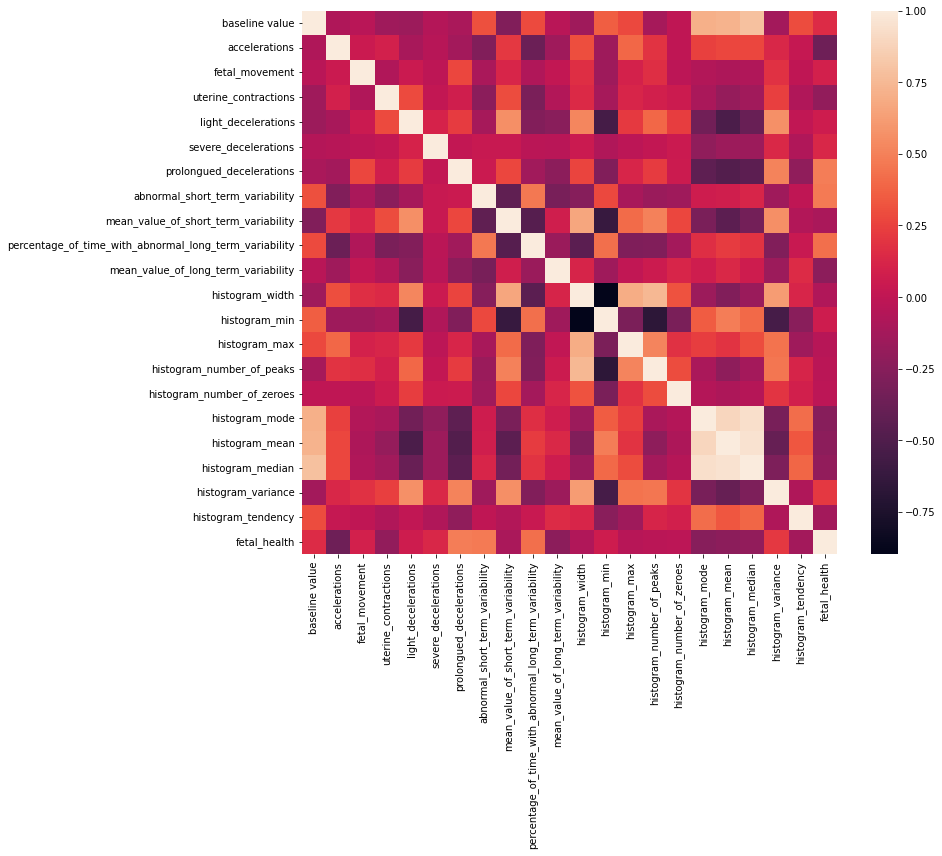

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix)
plt.show()

In [9]:
df = df.drop(['histogram_min','histogram_median','histogram_mode'], axis=1)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

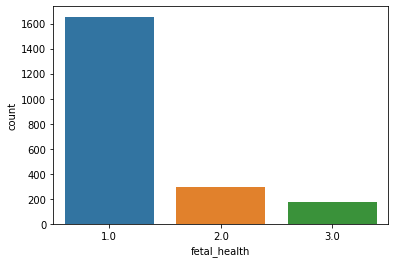

In [10]:
sns.countplot(df['fetal_health'])

conclusion: fetal_health is normally distributed

In [11]:
print("The Number of Samples in the dataset: ", len(df))
print('Class 1:', round(df['fetal_health'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

print('Class 2 :', round(df['fetal_health'].value_counts()[2]/len(df) * 100, 2), '% of the dataset')
print('Class 3 :', round(df['fetal_health'].value_counts()[3]/len(df) * 100, 2), '% of the dataset')


The Number of Samples in the dataset:  2126
Class 1: 77.85 % of the dataset
Class 2 : 13.88 % of the dataset
Class 3 : 8.28 % of the dataset


In [12]:
print("Skewness: %f" %df['fetal_health'].skew())

Skewness: 1.849934


highly skewed

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cv_method = StratifiedKFold(n_splits=3)
param={'criterion':('gini', 'entropy'),'min_samples_split': (2, 6, 20),'min_samples_leaf': (1, 4, 16),'n_estimators' :(100,150, 200, 250)}
clf = GridSearchCV(rf, param,cv=cv_method,scoring="accuracy")
clf.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'min_samples_leaf': (1, 4, 16),
                         'min_samples_split': (2, 6, 20),
                         'n_estimators': (100, 150, 200, 250)},
             scoring='accuracy')

In [15]:
clf.cv_results_

{'mean_fit_time': array([0.26299651, 0.43941752, 0.74827178, 1.18457945, 0.43302457,
        0.63504068, 0.77429438, 1.032547  , 0.38655122, 0.55687269,
        0.80677867, 0.87265436, 0.46411792, 0.82050776, 1.00340708,
        1.11892335, 0.40631   , 0.83848977, 1.84115497, 2.61579021,
        1.09026146, 1.63619606, 2.35787392, 3.00682974, 1.13414733,
        1.76233689, 1.68396433, 2.57508683, 0.90087668, 1.62501717,
        2.07568622, 2.17806172, 0.91419307, 0.9095192 , 2.00394622,
        2.63705993, 1.22372675, 1.51164794, 1.93210681, 2.65775919,
        1.24323543, 1.76333324, 1.7055397 , 1.59407147, 0.93793003,
        1.82129383, 1.82360959, 2.19480427, 0.9730014 , 1.38058273,
        1.8984127 , 2.20667156, 0.95809436, 1.50399208, 1.96015747,
        2.38662942, 0.88892659, 1.29010336, 1.74945776, 1.72858437,
        0.45947989, 1.02413241, 1.60771942, 2.03856262, 0.80781062,
        1.25692423, 1.56286502, 2.18756612, 0.84028586, 1.22770707,
        1.57442514, 2.16480875]

In [16]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [17]:
model = RandomForestClassifier(criterion= 'gini',min_samples_leaf= 1,min_samples_split=2,n_estimators= 150)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.945141065830721

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.90      0.77      0.83       101
         3.0       0.90      0.93      0.92        41

    accuracy                           0.95       638
   macro avg       0.92      0.89      0.90       638
weighted avg       0.94      0.95      0.94       638



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

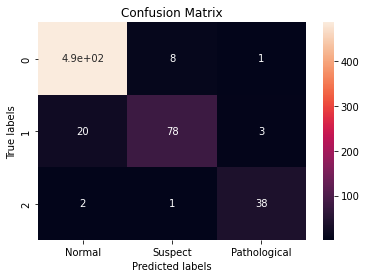

In [18]:
pred = model.predict(X_test)
print("Classification Report")
print(classification_report(Y_test, pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

# Why I used Random Forest Classifier?
* perform implicit feature selection
* methods for balancing error in unbalanced dataset(here, our target is unbalanced and we didn't use any sampling technique)